# 5. Model Deployment: Serve a Model using a Flask Webservice and Gunicorn to handle Concurrent Requests

For this last tutorial to work, make sure you have *Flask* installed in your environment:

```pip install Flask```

We will now embed the model inference within a simple webservice and test it using our test examples. For model inference, we use our TensorFlow model export and `pkg_resources` to treat it as a module. We create a Model instance from it (see `emnist_dl2prod.models`) that has a TensorFlow Session attached to it such that on every inference we have a loaded model and session without repetitive reloading.

Refer to the following implementations for this part:
* Model embedding: `emnist_dl2prod.models:Model`
* Webserver: `emnist_dl2prod.emnist_webserver`
* Generic Webservice Evaluation: `emnist_dl2prod.utils:eval_serving_accuracy`

Start the webservice with `python emnist_webserver.py`

## Evaluation

In [1]:
from emnist_dl2prod.utils import eval_serving_accuracy

[2018-10-13 17:57:09] INFO:emnist_dl2prod.utils:Loading train and test data from emnist_data/emnist-byclass.mat


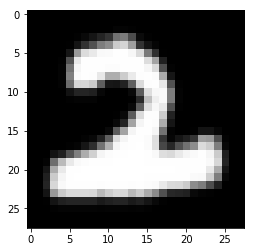

Label: 2
Predicted Label: 2


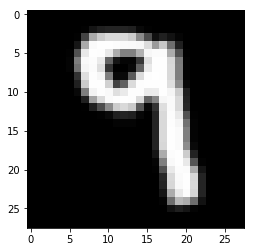

Label: 9
Predicted Label: 9


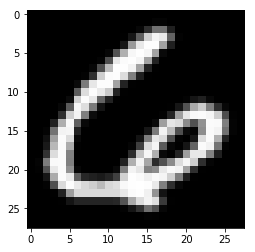

Label: 6
Predicted Label: 6


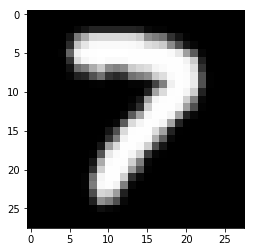

Label: 7
Predicted Label: 7


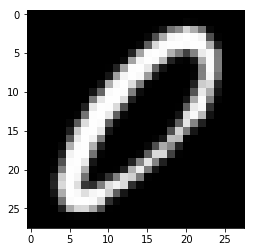

Label: O
Predicted Label: 0


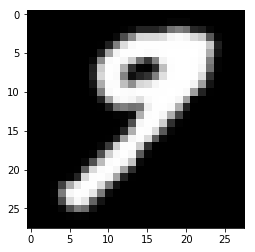

Label: 9
Predicted Label: 9


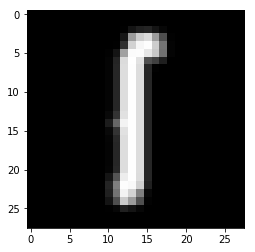

Label: 1
Predicted Label: 1


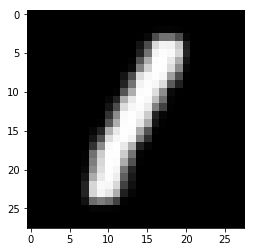

Label: 1
Predicted Label: 1


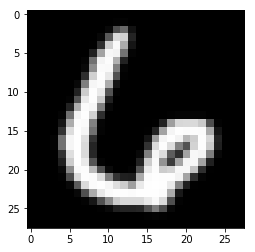

Label: 6
Predicted Label: 6


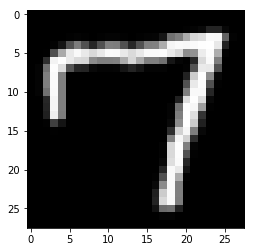

Label: 7
Predicted Label: 7
Accuracy on 1000 test images: 77.60%


In [2]:
response_durations = eval_serving_accuracy(n_examples=1000,
                                           n_print_examples=10,
                                           request_url='http://localhost:5000/')